[*]CC[*]


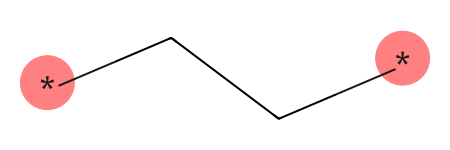

In [1]:
from psmiles import PolymerSmiles as PS

# polyethylene
pe = PS("[*]CC[*]")
pe
# SMILES strings (https://www.daylight.com/dayhtml/doc/theory/theory.smiles.html)

[*]CC(CC)[*]


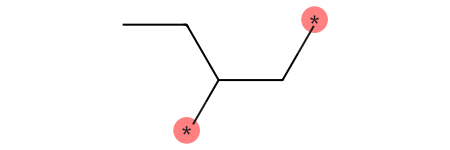

In [2]:
# polypropylene
pp = PS("[*]CC(CC)[*]")
pp

In [3]:
import pandas as pd
# Read csv and filter EGC
egc_df = pd.read_csv("../recources/export.csv")
egc_df = egc_df[egc_df.property == "Egc"]

#creating fingerprints for SS
smile_string_list = list(egc_df.smiles.values)
value_list = list(egc_df.value.values)
finger_print_list = []
for ss in smile_string_list:
    curren_polymere = PS(ss)
    
    
    finger_print_list.append(curren_polymere.fingerprint())

summary_list = list(zip(smile_string_list,finger_print_list,value_list))
fp_list_formatted = []
for i in finger_print_list:
    fp_list_formatted.append(i.tolist())
print(len(fp_list_formatted[0]))
ss_fp_egc_df = pd.DataFrame({'Smile': smile_string_list, 'Finger_prints': fp_list_formatted, 'Egc': value_list})
print(ss_fp_egc_df)

2048
                                                 Smile  \
0                                              [*]C[*]   
1                                          [*]CC([*])C   
2                                         [*]CC([*])CC   
3                                        [*]CC([*])CCC   
4                                     [*]CC([*])CC(C)C   
...                                                ...   
3375           [*]Nc1c([2H])c([2H])c([*])c([2H])c1[2H]   
3376               [*]CCCCCC[N+](C)(C)CCC[N+]([*])(C)C   
3377          [*]CCCCCCCC[N+](C)(C)CCCCCC[N+]([*])(C)C   
3378  [*]CCCCCCCCCCCCCCCC[N+](C)(C)CCCCCC[N+]([*])(C)C   
3379       [*]C=Cc1cc([Si](C)(C)C)c([*])cc1[Si](C)(C)C   

                                          Finger_prints     Egc  
0     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  6.8972  
1     [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  6.5196  
2     [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  6.5170  
3     [0, 1, 0, 0, 0, 0, 0, 0, 0, 

In [4]:
import numpy as np
import pandas as pd

final_df = pd.DataFrame(
    np.array(finger_print_list), index=smile_string_list
)

ss = pd.Series(value_list, index=smile_string_list, name="Egc")

concatenated_df = pd.concat(
    [final_df, ss],
    axis=1,
).reset_index(names="psmiles")
print(concatenated_df.set_index("psmiles").columns)




Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,     9,
       ...
        2039,  2040,  2041,  2042,  2043,  2044,  2045,  2046,  2047, 'Egc'],
      dtype='object', length=2049)


In [5]:
import autosklearn
import pandas as pd



auto_sk_df = concatenated_df.sample(frac=1, random_state=0)#shulles the df
print(auto_sk_df.shape)


psmlies_column = auto_sk_df["psmiles"]
auto_sk_df = auto_sk_df.drop(columns=["psmiles"])
auto_sk_df.reset_index(drop=True, inplace=True)
print(auto_sk_df.shape)
split_index = int(len(auto_sk_df) * 0.75)

train_df = auto_sk_df[:split_index]
test_df = auto_sk_df[split_index:]

test_df.head()

(3380, 2050)
(3380, 2049)


,0,1,2,3,4,5,6,7,8,9,...,2039,2040,2041,2042,2043,2044,2045,2046,2047,Egc
2535,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,3.0122
2536,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5.9727
2537,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,2.6702
2538,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5.6887
2539,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2.8274


In [6]:
X_train = train_df.to_numpy()[:, :-1]
y_train = train_df.to_numpy()[:, -1]

X_test = test_df.to_numpy()[:, :-1] 
y_test = test_df.to_numpy()[:, -1]

(X_train.shape, y_train.shape), (X_test.shape, y_test.shape)


(((2535, 2048), (2535,)), ((845, 2048), (845,)))

In [7]:
import autosklearn.regression

autosklearn_regressor = autosklearn.regression.AutoSklearnRegressor(
    time_left_for_this_task=240,
    per_run_time_limit=60,
    n_jobs=5,
    memory_limit=100000
    #tmp_folder="/tmp2/autosklearn_regression_example_tmp",
    
)

autosklearn_regressor.fit(X_train, y_train,dataset_name="check_egc")

AutoSklearnRegressor(ensemble_class=<class 'autosklearn.ensembles.ensemble_selection.EnsembleSelection'>,
                     memory_limit=100000, n_jobs=5, per_run_time_limit=60,
                     time_left_for_this_task=240)

In [8]:
# Annahme: autosklearn_regressor ist bereits trainiert
# Rufe die besten Modelle mit ihren Gewichtungen ab
models_with_weights = autosklearn_regressor.get_models_with_weights()

print(models_with_weights)


[(0.56, SimpleRegressionPipeline({'data_preprocessor:__choice__': 'feature_type', 'feature_preprocessor:__choice__': 'no_preprocessing', 'regressor:__choice__': 'gradient_boosting', 'data_preprocessor:feature_type:numerical_transformer:imputation:strategy': 'mean', 'data_preprocessor:feature_type:numerical_transformer:rescaling:__choice__': 'standardize', 'regressor:gradient_boosting:early_stop': 'train', 'regressor:gradient_boosting:l2_regularization': 0.005746611563553693, 'regressor:gradient_boosting:learning_rate': 0.0913971028976721, 'regressor:gradient_boosting:loss': 'least_squares', 'regressor:gradient_boosting:max_bins': 255, 'regressor:gradient_boosting:max_depth': 'None', 'regressor:gradient_boosting:max_leaf_nodes': 9, 'regressor:gradient_boosting:min_samples_leaf': 2, 'regressor:gradient_boosting:scoring': 'loss', 'regressor:gradient_boosting:tol': 1e-07, 'regressor:gradient_boosting:n_iter_no_change': 20},
dataset_properties={
  'task': 4,
  'sparse': False,
  'multioutpu

In [9]:
print(autosklearn_regressor.leaderboard())

          rank  ensemble_weight                 type      cost   duration
model_id                                                                 
19           1             0.56    gradient_boosting  0.132217  18.254062
6            2             0.20          extra_trees  0.148794  16.410814
2            3             0.08        random_forest  0.153530  35.157204
5            4             0.12        liblinear_svr  0.249747   1.121913
44           5             0.04  k_nearest_neighbors  0.436381  12.772146


In [10]:
print(autosklearn_regressor.show_models())


{2: {'model_id': 2, 'rank': 1, 'cost': 0.1535304477595938, 'ensemble_weight': 0.08, 'data_preprocessor': <autosklearn.pipeline.components.data_preprocessing.DataPreprocessorChoice object at 0x7f848cff5ae0>, 'feature_preprocessor': <autosklearn.pipeline.components.feature_preprocessing.FeaturePreprocessorChoice object at 0x7f846318f580>, 'regressor': <autosklearn.pipeline.components.regression.RegressorChoice object at 0x7f846318c9a0>, 'sklearn_regressor': RandomForestRegressor(max_features=1.0, n_estimators=512, n_jobs=1,
                      random_state=1, warm_start=True)}, 5: {'model_id': 5, 'rank': 2, 'cost': 0.249747206970649, 'ensemble_weight': 0.12, 'data_preprocessor': <autosklearn.pipeline.components.data_preprocessing.DataPreprocessorChoice object at 0x7f847c197100>, 'feature_preprocessor': <autosklearn.pipeline.components.feature_preprocessing.FeaturePreprocessorChoice object at 0x7f84630a38b0>, 'regressor': <autosklearn.pipeline.components.regression.RegressorChoice objec

(2535,)
[3.06247673 5.89366253 2.75978255 5.75915597 2.66003054 2.53514969
 4.04251146 3.29761237 3.47543512 6.14390904 6.04676524 5.67872891
 3.01882643 3.29861507 2.52905626 5.61361651 3.93211059 5.89581493
 3.26770902 4.05230182 2.58985807 3.61458248 3.74178279 4.34910809
 5.69237199 3.04162608 6.12648083 3.54114895 2.60476327 4.11083911
 1.74485926 2.41148381 6.95164865 6.09696957 3.47740366 3.05563425
 4.4446999  6.08566365 3.24130327 2.3546367  6.57105415 4.62113762
 3.65010132 4.10160971 5.8539037  3.14169091 4.83025065 3.78053947
 2.90371542 5.76456434 3.38814722 5.49365272 2.78752676 4.61948226
 4.11183339 3.72807057 6.05300459 5.60650003 3.2644317  2.54882735
 1.99503826 6.03293443 3.18583646 2.72821266 4.77598929 4.1174859
 6.9184722  6.43021315 6.25039981 3.5099889  5.79832774 6.47488585
 3.56628214 4.5614135  3.81163083 6.20170888 6.60778633 6.39097252
 5.1796989  2.97971375 2.94107322 6.24500863 2.71018552 5.73755005
 6.13521117 2.47381378 6.33095527 3.36923215 6.61230955

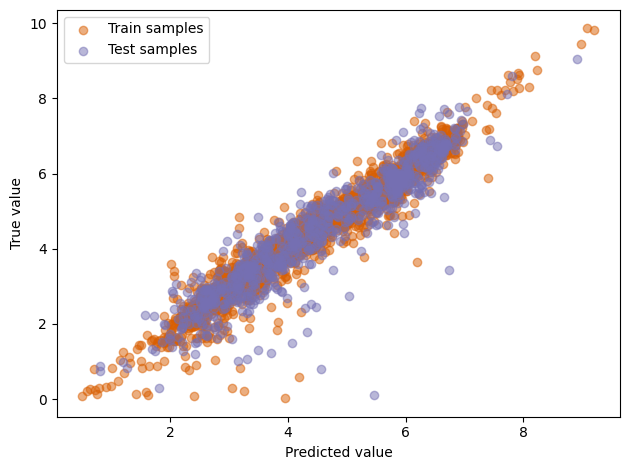

In [11]:
import matplotlib.pyplot as plt
train_predictions = autosklearn_regressor.predict(X_train)
test_predictions = autosklearn_regressor.predict(X_test)
print(train_predictions.shape)
print(test_predictions)
plt.scatter(train_predictions, y_train, label="Train samples", c="#d95f02",alpha=0.5)
plt.scatter(test_predictions, y_test, label="Test samples", c="#7570b3",alpha=0.5)
plt.xlabel("Predicted value")
plt.ylabel("True value")
plt.legend()
#plt.plot([30, 500000], [30, 500000], c="k", zorder=0)
plt.tight_layout()
plt.show()

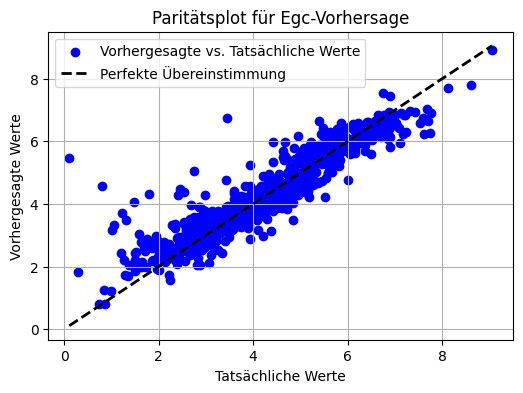

In [17]:
import matplotlib.pyplot as plt

# Vorhersagewerte (angenommen, du hast diese schon)
# y_pred = predictor.predict(test_df.drop(columns=[label]))

# Paritätsplot erstellen
plt.figure(figsize=(6, 4))  # Größe des Plots anpassen
plt.scatter(y_test, test_predictions, color='blue', label='Vorhergesagte vs. Tatsächliche Werte')  # Daten als Punkte darstellen
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Perfekte Übereinstimmung')  # Linie für perfekte Übereinstimmung
plt.xlabel('Tatsächliche Werte')
plt.ylabel('Vorhergesagte Werte')
plt.title('Paritätsplot für Egc-Vorhersage')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate predictions for training and test data
train_predictions = autosklearn_regressor.predict(X_train)
test_predictions = autosklearn_regressor.predict(X_test)

# Create a scatter plot visualization
plt.figure(figsize=(10, 6))

plt.scatter(train_predictions, y_train, label="Training Data", c="#1f77b4", alpha=0.7, edgecolors='k', marker='o')
plt.scatter(test_predictions, y_test, label="Test Data", c="#ff7f0e", alpha=0.7, edgecolors='k', marker='o')

# Add the 1:1 line
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='gray', linestyle='--', linewidth=2, label="Ideal Prediction")

plt.xlabel("Predicted Value")
plt.ylabel("Actual Value")
plt.title("Predictions vs. Actual Values")
plt.legend()

plt.tight_layout()
plt.show()




In [13]:
from sklearn.metrics import mean_absolute_error as mae

mae(y_train, autosklearn_regressor.predict(X_train)), mae(y_test, autosklearn_regressor.predict(X_test))

(0.24582713598641678, 0.3704330202678816)

In [18]:
import sklearn
train_predictions = autosklearn_regressor.predict(X_train)# but which model is used now? He uses his 4 models with weights
print("Train R2 score:", sklearn.metrics.r2_score(y_train, train_predictions))
test_predictions = autosklearn_regressor.predict(X_test)
print("Test R2 score:", sklearn.metrics.r2_score(y_test, test_predictions))
train_mse = sklearn.metrics.mean_squared_error(y_train, train_predictions)
test_mse = sklearn.metrics.mean_squared_error(y_test, test_predictions)
print(train_mse,test_mse)

Train R2 score: 0.9426706540549072
Test R2 score: 0.871111491645149
0.139844284187135 0.3158778531384795


In [15]:
from sklearn.metrics import r2_score, mean_absolute_error , mean_squared_error



In [26]:
%pip install --upgrade pip
%pip install --upgrade scikit-learn

%pip install --upgrade pycaret


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [28]:
from pycaret.regression import *




setup(train_data, target='Egc')

best_model = compare_models()

print("best Modell:  ",best_model)

trained_model = tune_model(best_model)

predictions = predict_model(trained_model, data=test_data)
predictions.head()


ImportError: cannot import name '_OneToOneFeatureMixin' from 'sklearn.base' (/home/ibrahim/.venv/lib/python3.10/site-packages/sklearn/base.py)

In [ ]:
evaluate_model(best_model)
save_model(best_model,"best_pycarret_model")

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Huber Regressor,0.3184,0.2466,0.4966,0.8990,0.1190,0.1591


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Huber Regressor,0.5608,0.6168,0.7853,0.7473,0.1867,0.2995


[WARNING] [2023-08-31 08:52:49,534:matplotlib.font_manager] findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
[WARNING] [2023-08-31 08:52:49,535:matplotlib.font_manager] findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
[WARNING] [2023-08-31 08:52:49,536:matplotlib.font_manager] findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
[WARNING] [2023-08-31 08:52:49,537:matplotlib.font_manager] findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
[WARNING] [2023-08-31 08:52:49,538:matplotlib.font_manager] findfont: Generic family 'sans-serif' not found because none of the following fa

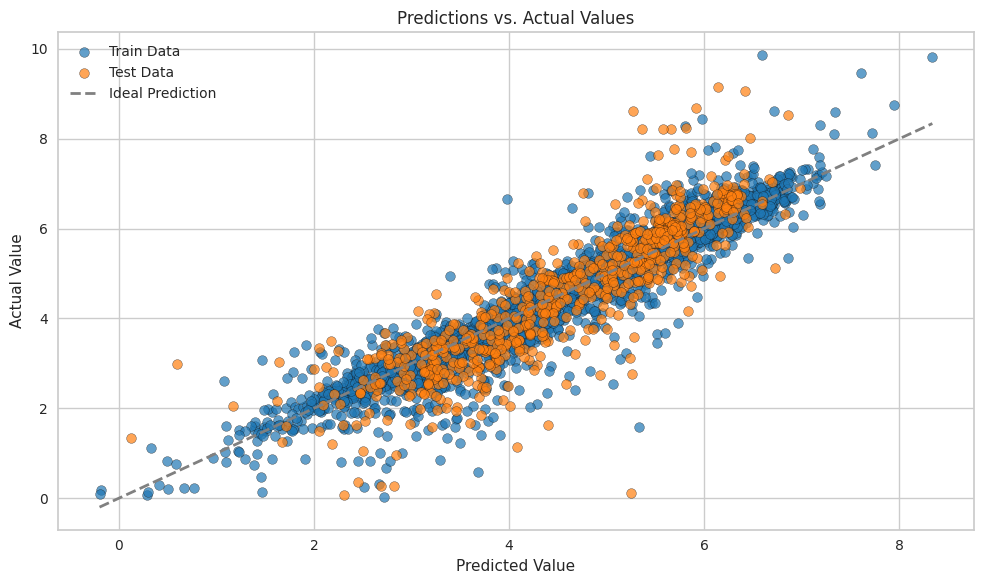

In [ ]:
import matplotlib.pyplot as plt

train_prediction = predict_model(trained_model, data=train_data)
test_prediction = predict_model(trained_model, data=test_data)

plt.figure(figsize=(10, 6))
plt.scatter(train_prediction['prediction_label'], train_prediction['Egc'], c='#1f77b4', alpha=0.7, edgecolors='k', marker='o', label="Train Data")
plt.scatter(test_prediction['prediction_label'], test_prediction['Egc'], c='#ff7f0e', alpha=0.7, edgecolors='k', marker='o', label="Test Data")
plt.plot([min(train_prediction['prediction_label']), max(train_prediction['prediction_label'])], [min(train_prediction['prediction_label']), max(train_prediction['prediction_label'])], color='gray', linestyle='--', linewidth=2, label="Ideal Prediction")

plt.xlabel("Predicted Value")
plt.ylabel("Actual Value")
plt.title("Predictions vs. Actual Values")
plt.legend()

plt.tight_layout()
plt.show()



In [ ]:
data = {"psmiles": smile_string_list}

for fp_list in fp_list_formatted:
    for i in range(len(fp_list)):
        data[str(i)] = fp_list[i]
data["Egc"] = value_list
long_ss_fp_egc_df = pd.DataFrame(data)
print(long_ss_fp_egc_df)

                                               psmiles  0  1  2  3  4  5  6  \
0                                              [*]C[*]  0  0  0  0  0  0  0   
1                                          [*]CC([*])C  0  0  0  0  0  0  0   
2                                         [*]CC([*])CC  0  0  0  0  0  0  0   
3                                        [*]CC([*])CCC  0  0  0  0  0  0  0   
4                                     [*]CC([*])CC(C)C  0  0  0  0  0  0  0   
...                                                ... .. .. .. .. .. .. ..   
3375           [*]Nc1c([2H])c([2H])c([*])c([2H])c1[2H]  0  0  0  0  0  0  0   
3376               [*]CCCCCC[N+](C)(C)CCC[N+]([*])(C)C  0  0  0  0  0  0  0   
3377          [*]CCCCCCCC[N+](C)(C)CCCCCC[N+]([*])(C)C  0  0  0  0  0  0  0   
3378  [*]CCCCCCCCCCCCCCCC[N+](C)(C)CCCCCC[N+]([*])(C)C  0  0  0  0  0  0  0   
3379       [*]C=Cc1cc([Si](C)(C)C)c([*])cc1[Si](C)(C)C  0  0  0  0  0  0  0   

      7  8  ...  2039  2040  2041  2042  2043  2044

In [ ]:
import numpy as np
import pandas as pd

df = pd.DataFrame(
    np.array([pe.fingerprint(), pp.fingerprint()]), index=[pe.psmiles, pp.psmiles]
)

ss = pd.Series([3.1, 3.4], index=[pe.psmiles, pp.psmiles], name="Egc")
pd.concat(
    [df, ss],
    axis=1,
).reset_index(names="psmiles")

,psmiles,0,1,2,3,4,5,6,7,8,...,2039,2040,2041,2042,2043,2044,2045,2046,2047,Egc
0,[*]CC[*],0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3.1
1,[*]CC(CC)[*],1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3.4
